<a href="https://colab.research.google.com/github/i-ganza007/Multimodal-Data-Preprocessing/blob/main/Data_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Data Merge

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Extracting the id columns for each dataset
customer_transactions_id= customer_transactions['customer_id_legacy']
customer_social_profiles_id= customer_social_profiles['customer_id_new']

In [4]:
# printing them
print(customer_transactions_id)
print(customer_social_profiles_id)

0      151
1      192
2      114
3      171
4      160
      ... 
145    102
146    100
147    104
148    189
149    113
Name: customer_id_legacy, Length: 150, dtype: int64
0      A178
1      A190
2      A150
3      A162
4      A197
       ... 
150    A125
151    A116
152    A189
153    A162
154    A155
Name: customer_id_new, Length: 155, dtype: object


In [5]:
# Step 1: Extract number from A151 → 151 and merging two datasets
customer_social_profiles["id_number"] = customer_social_profiles["customer_id_new"].str.extract(r"(\d+)").astype(int)
customer_transactions.rename(columns={"customer_id_legacy": "id_number"}, inplace=True)
merged_dataset = pd.merge(customer_transactions, customer_social_profiles, on="id_number", how="inner")

In [14]:
print(merged_dataset.head())
print("Merged dataset shape:", merged_dataset.shape)

   id_number  transaction_id  purchase_amount purchase_date product_category  \
0        151            1001              408    2024-01-01           Sports   
1        151            1001              408    2024-01-01           Sports   
2        151            1001              408    2024-01-01           Sports   
3        192            1002              332    2024-01-02      Electronics   
4        114            1003              442    2024-01-03      Electronics   

   customer_rating customer_id_new social_media_platform  engagement_score  \
0              2.3            A151                TikTok                61   
1              2.3            A151               Twitter                72   
2              2.3            A151               Twitter                82   
3              4.2            A192             Instagram                60   
4              2.1            A114              Facebook                87   

   purchase_interest_score review_sentiment  
0   

In [7]:
# Checking duplicats
merged_dataset.duplicated().sum()

np.int64(6)

In [9]:
# removing duplicates
merged_dataset = merged_dataset.drop_duplicates()

In [8]:
# checking null values
merged_dataset.isna().sum()

,0
id_number,0
transaction_id,0
purchase_amount,0
purchase_date,0
product_category,0
customer_rating,19
customer_id_new,0
social_media_platform,0
engagement_score,0
purchase_interest_score,0


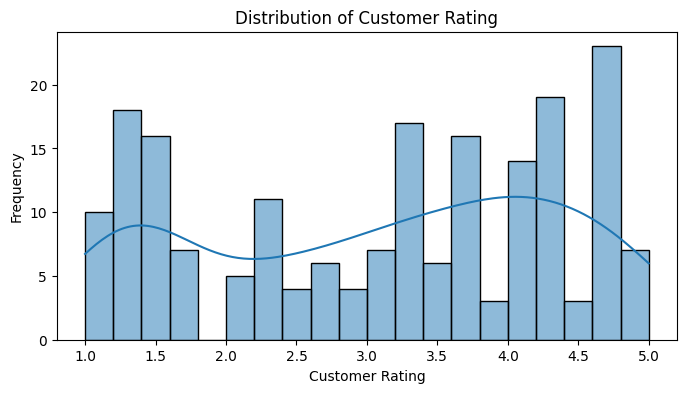

In [15]:
# Plot the distribution of customer_rating
plt.figure(figsize=(8, 4))
sns.histplot(merged_dataset['customer_rating'], kde=True, bins=20)
plt.title('Distribution of Customer Rating')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.show()


In [16]:
print("Skewness:", merged_dataset['customer_rating'].skew())
print(merged_dataset['customer_rating'].describe())


Skewness: -0.21213602149240177
count    196.000000
mean       3.078061
std        1.260638
min        1.000000
25%        1.700000
50%        3.200000
75%        4.200000
max        5.000000
Name: customer_rating, dtype: float64


In [17]:
# we used mean due to low skewness
merged_dataset['customer_rating'] = merged_dataset['customer_rating'].fillna(
    merged_dataset['customer_rating'].mean()
)

In [18]:
merged_dataset.isna().sum()

,0
id_number,0
transaction_id,0
purchase_amount,0
purchase_date,0
product_category,0
customer_rating,0
customer_id_new,0
social_media_platform,0
engagement_score,0
purchase_interest_score,0


In [19]:
# Saving the merged data into a csv
merged_dataset.to_csv('merged_dataset.csv', index=False)